# Install Packages

In [1]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost
!pip install seaborn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b7/91/ab3c697188f224d658969f678be86b0968ccc52774c8ab4a86a07be13c25/scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e4/3c/e3a93bfa7e8693c825df5ec02a40f7ff5f0950e02198b1e85da9315a8d47/xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for nvidia-nccl-cu12 from https://files.pythonhosted.org/packages/11/0c/8c78b7603f4e685624a3ea944940f1e75f36d71bd6504330511f4a0e1557/nvidia_nccl_cu12-2.25.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv", nrows=5000000)
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,A-5037883,Source1,2,2022-11-09 16:09:00,2022-11-09 17:34:00,34.185388,-118.317917,34.218077,-118.355055,3.099,...,False,False,False,False,False,False,Day,Day,Day,Day
4999996,A-5037884,Source1,2,2022-07-24 19:19:50,2022-07-24 20:39:23,32.934967,-117.242523,32.935341,-117.242500,0.026,...,False,False,False,False,False,False,Day,Day,Day,Day
4999997,A-5037885,Source1,2,2023-01-18 15:55:30,2023-01-18 17:07:30,37.700654,-121.796602,37.729395,-121.633486,9.134,...,False,False,False,False,False,False,Day,Day,Day,Day
4999998,A-5037886,Source1,2,2022-10-13 14:22:30,2022-10-13 14:53:00,37.700647,-121.796590,37.701347,-121.769970,1.456,...,False,False,False,False,False,False,Day,Day,Day,Day


# 1. Data Exploration

In [4]:
print("Dataset shape:", df.shape)
print("\nColumn types:")
print(df.dtypes.value_counts())
print("\nBasic information:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

Dataset shape: (5000000, 46)

Column types:
object     20
bool       13
float64    12
int64       1
Name: count, dtype: int64

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code    

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values[missing_values > 0].sort_values(ascending=False))


Missing values:
End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        1840308
Wind_Chill(F)            1707907
Wind_Speed(mph)           442145
Visibility(mi)            105610
Weather_Condition         102683
Humidity(%)               100298
Wind_Direction             96508
Temperature(F)             94114
Pressure(in)               80673
Weather_Timestamp          67442
Sunrise_Sunset             13133
Civil_Twilight             13133
Nautical_Twilight          13133
Astronomical_Twilight      13133
Airport_Code               12552
Street                      6593
Timezone                    4300
Zipcode                      844
City                         136
Description                    5
dtype: int64


In [6]:
# Handle missing values
columns_to_check = ['Precipitation(in)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
                    'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
                    'Weather_Condition', 'City', 'Sunrise_Sunset', 'Civil_Twilight', 
                    'Nautical_Twilight', 'Astronomical_Twilight']

df = df.dropna(subset=columns_to_check)

print("\nPercentage of missing values after handling:")
print(df.isna().sum() / len(df) * 100)


Percentage of missing values after handling:
ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  56.406259
End_Lng                  56.406259
Distance(mi)              0.000000
Description               0.000102
Street                    0.206295
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipita

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.dropna(thresh=40)
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
11,A-12,Source2,3,2016-02-08 08:21:27,2016-02-08 08:51:27,39.932709,-82.830910,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
14,A-15,Source2,2,2016-02-08 08:39:43,2016-02-08 09:09:43,39.972038,-82.913521,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
20,A-21,Source2,2,2016-02-08 10:11:15,2016-02-08 10:41:15,40.052509,-82.882332,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,A-5037883,Source1,2,2022-11-09 16:09:00,2022-11-09 17:34:00,34.185388,-118.317917,34.218077,-118.355055,3.099,...,False,False,False,False,False,False,Day,Day,Day,Day
4999996,A-5037884,Source1,2,2022-07-24 19:19:50,2022-07-24 20:39:23,32.934967,-117.242523,32.935341,-117.242500,0.026,...,False,False,False,False,False,False,Day,Day,Day,Day
4999997,A-5037885,Source1,2,2023-01-18 15:55:30,2023-01-18 17:07:30,37.700654,-121.796602,37.729395,-121.633486,9.134,...,False,False,False,False,False,False,Day,Day,Day,Day
4999998,A-5037886,Source1,2,2022-10-13 14:22:30,2022-10-13 14:53:00,37.700647,-121.796590,37.701347,-121.769970,1.456,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df.fillna(method='ffill', limit=5, inplace=True)
df.fillna(method='bfill', limit=5, inplace=True)

/tmp/ipykernel_26/1041787634.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=5, inplace=True)
/tmp/ipykernel_26/1041787634.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', limit=5, inplace=True)


In [10]:
df.drop(columns=['End_Lat', 'End_Lng'],inplace= True)
df.dropna(subset=['Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)'],inplace = True)

In [11]:
# # Mengubah kolom 'Start_Time' menjadi tipe datetime
# df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='ISO8601')

# # Filter berdasarkan tahun 2020 ke atas
# filtered_df = df.loc[df['Start_Time'].dt.year >= 2020]
# filtered_df
# filtered_df.shape

In [12]:
columns_to_use = ['ID','Source','Severity','Start_Time','End_Time','Distance(mi)','Description','Airport_Code','Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Start_Lat','Start_Lng']
columns_to_drop = [feature for feature in df.columns if feature not in columns_to_use]

df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

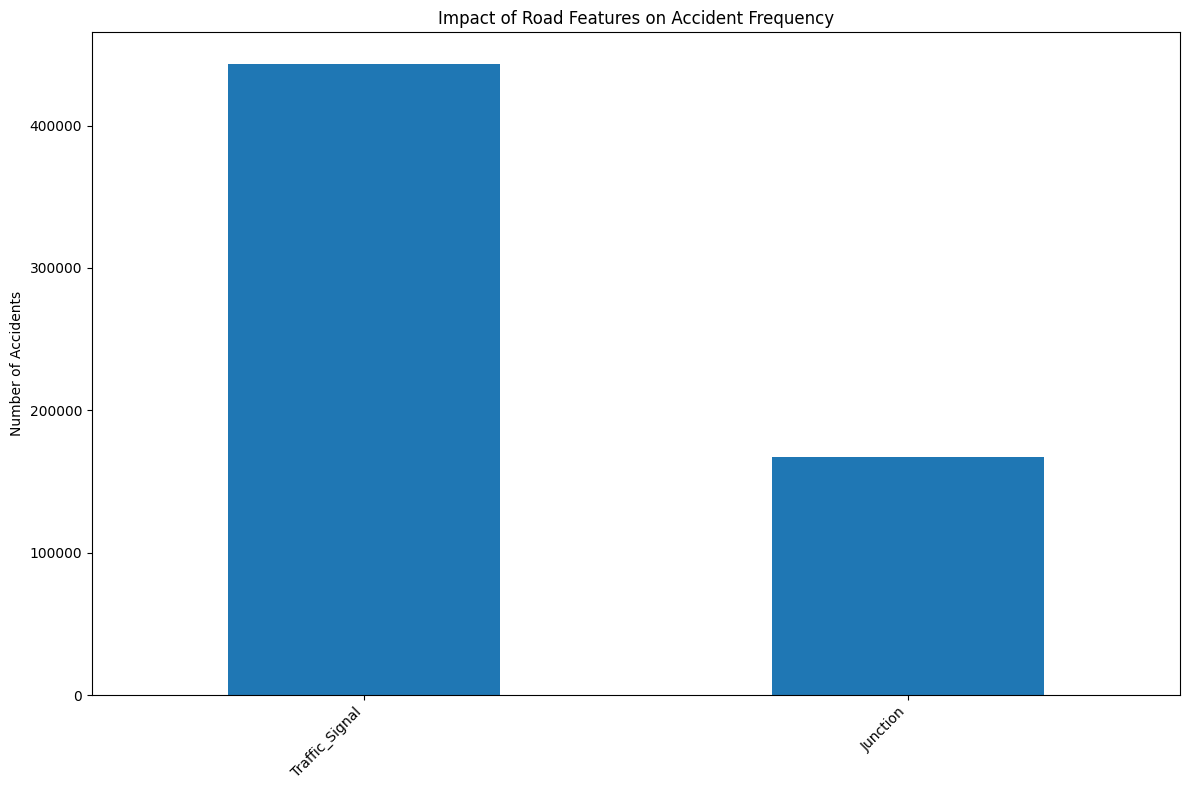

In [13]:
# 2. Road Conditions Analysis

road_features = ['Junction','Traffic_Signal']
feature_impact = df[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_impact.plot(kind='bar')
plt.title('Impact of Road Features on Accident Frequency')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

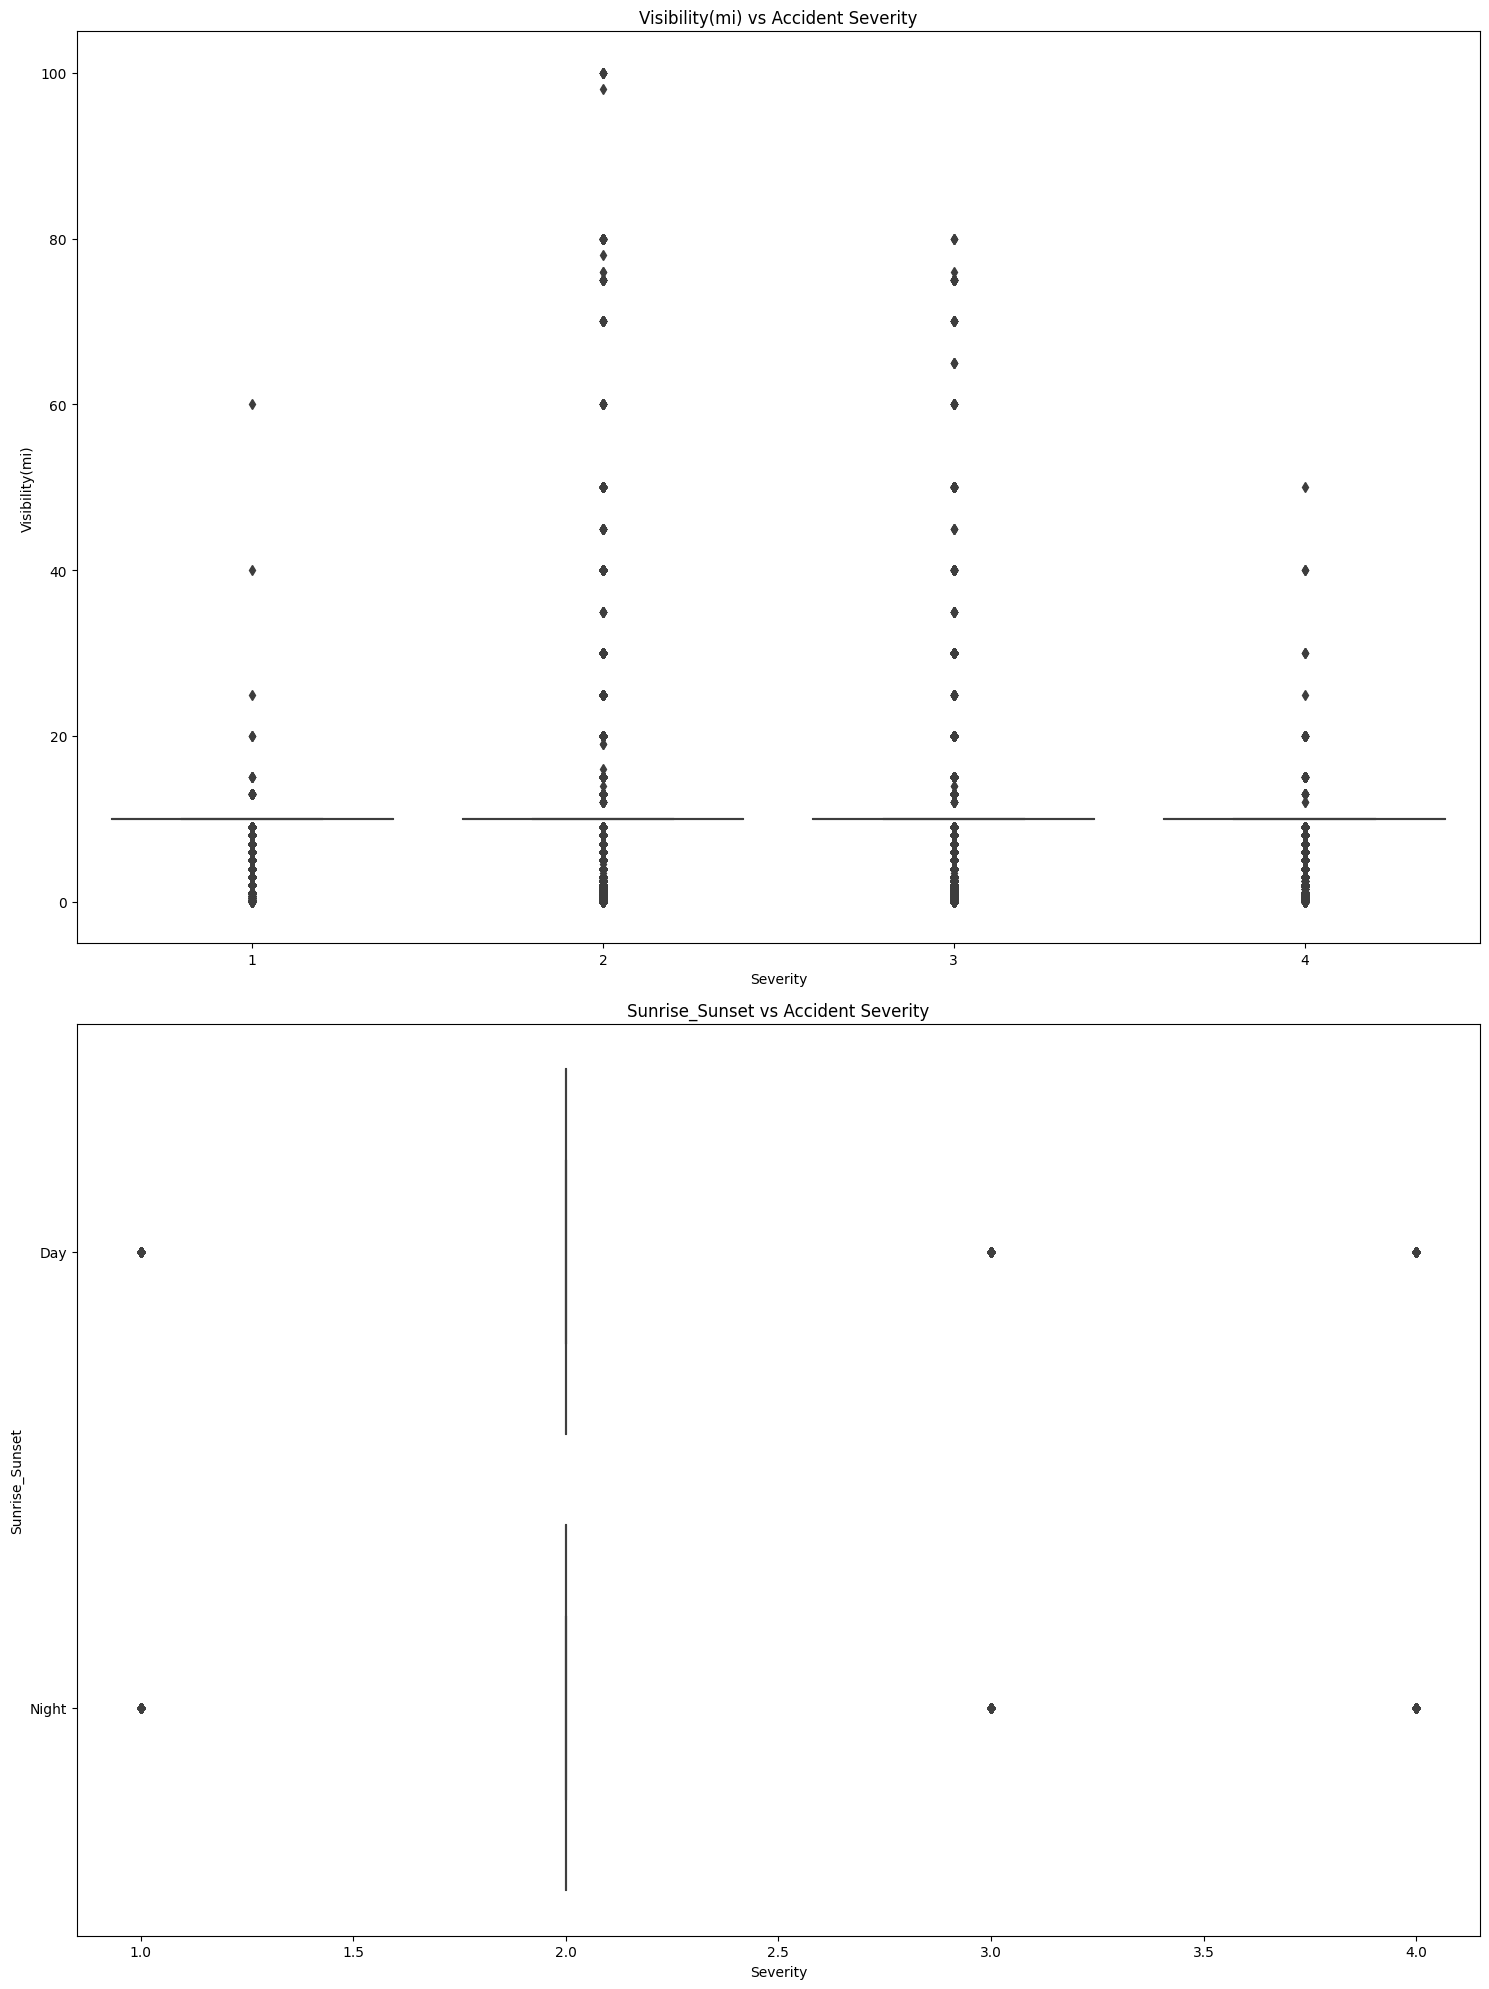

In [14]:
# Analyze relationship between weather factors and accident severity
weather_factors = ['Visibility(mi)','Sunrise_Sunset']

fig, axes = plt.subplots(2, figsize=(15, 20))
axes = axes.flatten()

for i, factor in enumerate(weather_factors):
    sns.boxplot(x='Severity', y=factor, data=df, ax=axes[i])
    axes[i].set_title(f'{factor} vs Accident Severity')

plt.tight_layout()
plt.show()

In [15]:
filtered_df = df

In [16]:
filtered_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Airport_Code,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,KCMH,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.01,Right hand shoulder blocked due to accident on...,KCMH,...,False,False,False,False,False,False,Day,Day,Day,Day
11,A-12,Source2,3,2016-02-08 08:21:27,2016-02-08 08:51:27,39.932709,-82.830910,0.01,One lane blocked due to accident on I-70 Westb...,KCMH,...,False,False,False,False,False,False,Day,Day,Day,Day
14,A-15,Source2,2,2016-02-08 08:39:43,2016-02-08 09:09:43,39.972038,-82.913521,0.01,Accident on OH-16 Broad St at James Rd. Expect...,KCMH,...,False,False,False,False,True,False,Day,Day,Day,Day
20,A-21,Source2,2,2016-02-08 10:11:15,2016-02-08 10:41:15,40.052509,-82.882332,0.00,Accident on Brookhill Dr at Glenhurst Ct.,KCMH,...,False,False,False,False,False,False,Day,Day,Day,Day


In [17]:
outlier = ["Start_Lat","Start_Lng"]

for i in outlier:
  # IQR
  # Calc upper and lower limits
  Q_1 = filtered_df[i].quantile(0.25)
  Q_3 = filtered_df[i].quantile(0.75)
  IQR = Q_3 - Q_1
  lower = Q_1 - 1.5 * IQR
  upper = Q_3 + 1.5 * IQR

  # Create arrays of Boolean values indicating the outlier
  upper_array = np.where(filtered_df[i]>=upper)[0]
  lower_array = np.where(filtered_df[i]<=lower)[0]

  # Remove outlier
  filtered_df = filtered_df[~filtered_df.index.isin(upper_array)]
  filtered_df = filtered_df[~filtered_df.index.isin(lower_array)]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


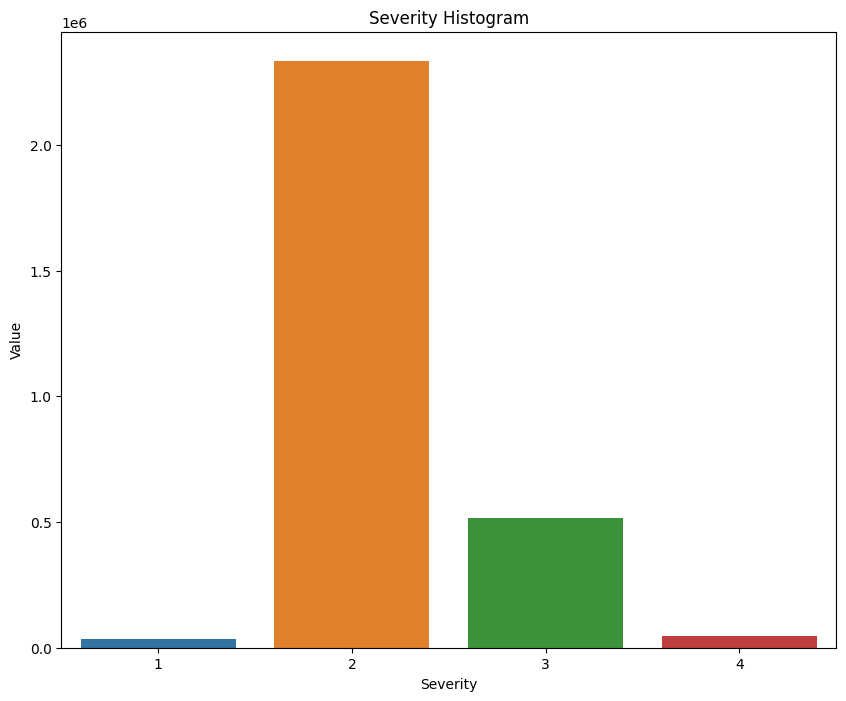

In [18]:
count_severity = filtered_df["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Severity Histogram")
sns.barplot(x=count_severity.index, y=count_severity.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [19]:
# Kalau mau di balance tapi jumlah data jadi sedikit

severity1_size = len(filtered_df[filtered_df["Severity"] == 1].index)
df_balance = pd.DataFrame()
for i in range(1,5):
    sampled = filtered_df[filtered_df["Severity"] == i]
#     df_balance = df_balance.append(sampled.sample(severity1_size, random_state=42))
    df_balance = pd.concat([df_balance, sampled.sample(severity1_size, random_state=42)], ignore_index=True)
df_balance

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Airport_Code,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-597120,Source2,1,2022-06-10 10:02:02,2022-06-10 10:46:33,30.198259,-92.070068,0.000,Crash on Congress St at Guilbeau Rd.,KLFT,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-535365,Source2,1,2022-08-17 08:15:20,2022-08-17 08:44:05,27.339470,-82.452591,0.000,Crash on Commercial Way at Cattlemen Rd.,KSRQ,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-522787,Source2,1,2022-08-30 06:38:08,2022-08-30 07:24:29,30.431980,-91.007446,0.000,Crash on LA-3245 O'Neal Ln at Lirocchi Dr.,KBTR,...,False,False,False,False,False,False,Night,Day,Day,Day
3,A-590461,Source3,1,2022-06-17 08:11:38,2022-06-17 08:56:15,27.533020,-81.435280,0.000,Crash on Clubhouse Blvd at Power Line Rd.,KBOW,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-533830,Source2,1,2022-08-18 10:18:56,2022-08-18 11:33:39,34.912876,-82.237137,0.000,Crash on SC-14 at Buncombe Rd.,KGSP,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145903,A-1380970,Source2,4,2020-07-08 11:43:42,2020-07-08 13:42:14,37.761337,-81.213860,0.000,Lane blocked due to accident on I-64 Southboun...,KBKW,...,False,False,False,False,False,False,Day,Day,Day,Day
145904,A-4857093,Source1,4,2022-03-17 04:32:16,2022-03-17 05:58:24,42.938131,-78.534269,0.379,Incident on WALDEN AVE WB near WENDE RD Road c...,KBUF,...,False,False,False,False,False,False,Night,Night,Night,Night
145905,A-4187247,Source1,4,2022-12-23 13:46:24.000000000,2022-12-23 15:58:57.000000000,42.314647,-85.235764,0.089,NB M-37 at 5th Ave,KBTL,...,False,False,False,False,False,False,Day,Day,Day,Day
145906,A-1340194,Source2,4,2020-10-14 11:10:17,2020-10-14 12:24:36,33.138241,-97.047867,1.770,Delays due to accident on I-35E Southbound fro...,KDTO,...,False,False,False,False,False,False,Day,Day,Day,Day


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


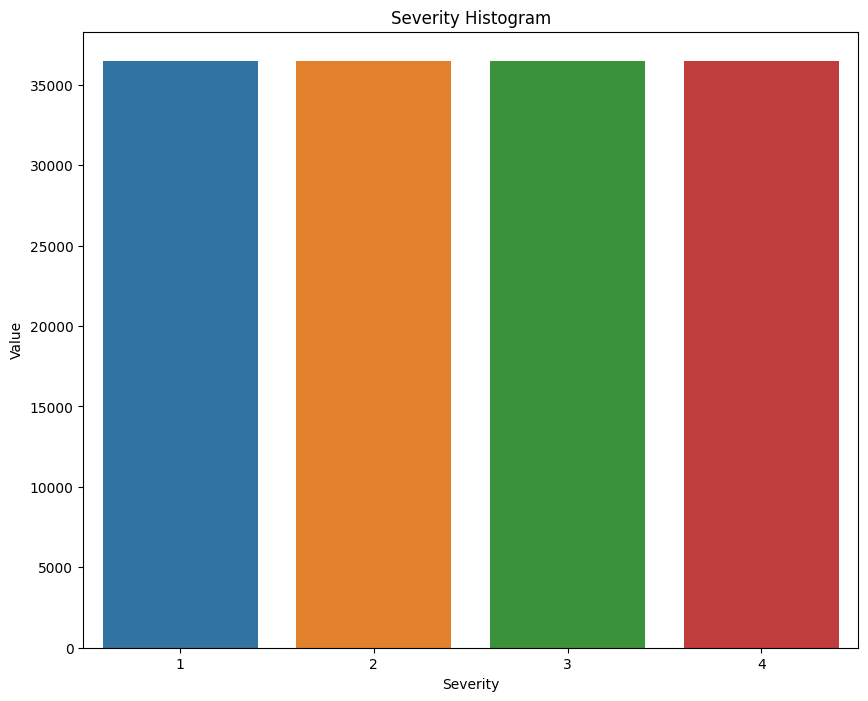

In [20]:
count_severity = df_balance["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Severity Histogram")
sns.barplot(x=count_severity.index, y=count_severity.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [21]:
df_balance = df.copy()

df_balance.shape

(2934146, 37)

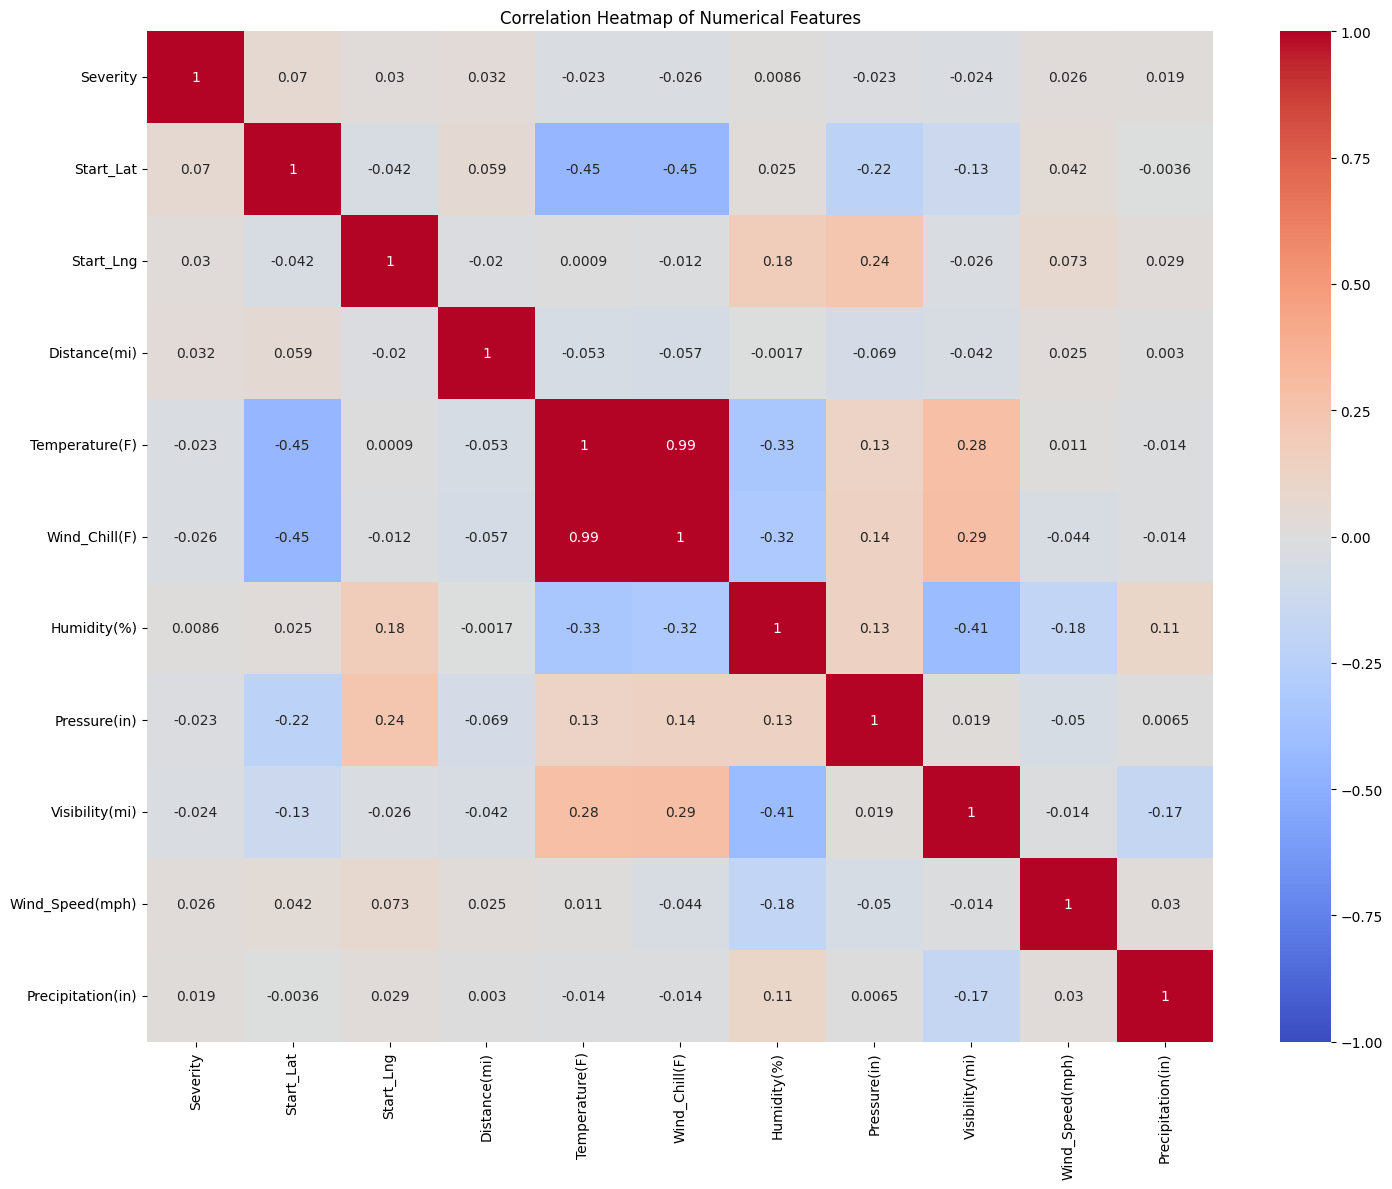

In [22]:
df_num = df_balance.select_dtypes(np.number)
plt.figure(figsize=(15, 12))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

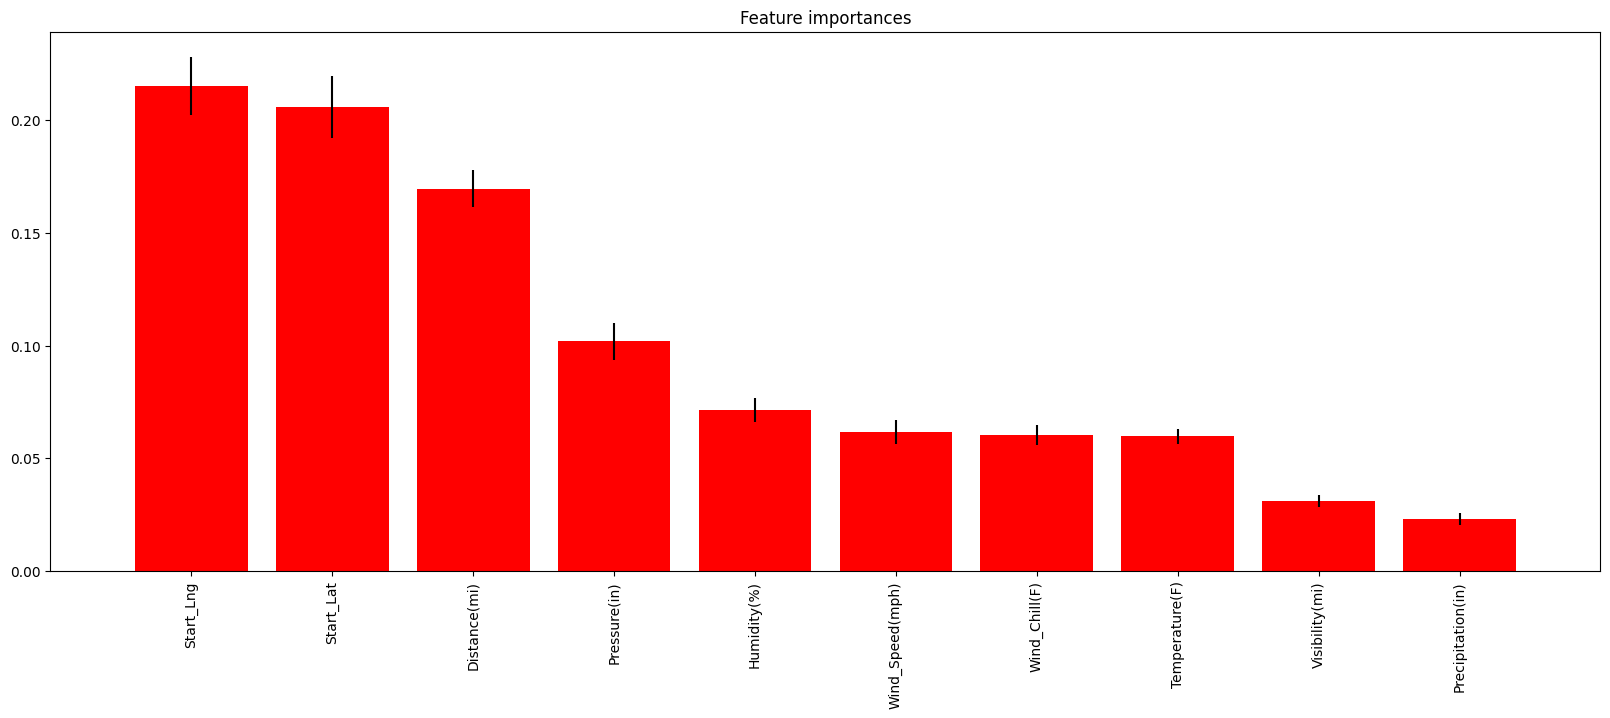

In [23]:
train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64'or df[col].dtype=='int64']
train_col= df[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)


importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


## Train Test, Split

In [24]:
from sklearn.preprocessing import LabelEncoder

sampled_dff = df_balance.sample(frac=0.1, random_state=42)
sampled_dff.dropna(inplace=True)
categorical_cols = sampled_dff.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_dff[col] = label_encoder.fit_transform(sampled_dff[col])

In [25]:
y = sampled_dff['Severity'].copy()
X = sampled_dff.drop('Severity', axis=1).copy()

In [26]:
y.unique()

array([2, 3, 1, 4])

In [27]:
y = y-1

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
n_components = min(X_scaled.shape[0], X_scaled.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, random_state=100)
X_train.shape

(234732, 36)

In [31]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def classification_task(model, X_train, y_train, X_test, y_test, predic, model_name, training_time):
    if hasattr(model, 'score'):
        # Handle scikit-learn model
        perf_df = pd.DataFrame({
            'Train_Score': [model.score(X_train, y_train)],
            'Test_Score': [model.score(X_test, y_test)],
            'Precision_Score': [precision_score(y_test, predic, average='weighted')],
            'Recall_Score': [recall_score(y_test, predic, average='weighted')],
            'F1_Score': [f1_score(y_test, predic, average='weighted')],
            'Accuracy': [accuracy_score(y_test, predic)],
            'Training_Time': [training_time]
        }, index=[model_name])
    else:
        # Handle TensorFlow/Keras model (not applicable here)
        y_train_pred = model.predict(X_train)
        y_train_pred_classes = y_train_pred.argmax(axis=1) if y_train_pred.ndim > 1 else y_train_pred
        y_test_pred_classes = predic.argmax(axis=1) if predic.ndim > 1 else predic
        
        train_accuracy = accuracy_score(y_train, y_train_pred_classes)
        test_accuracy = accuracy_score(y_test, y_test_pred_classes)
        
        perf_df = pd.DataFrame({
            'Train_Score': [train_accuracy],
            'Test_Score': [test_accuracy],
            'Precision_Score': [precision_score(y_test, y_test_pred_classes, average='weighted')],
            'Recall_Score': [recall_score(y_test, y_test_pred_classes, average='weighted')],
            'F1_Score': [f1_score(y_test, y_test_pred_classes, average='weighted')],
            'Accuracy': [accuracy_score(y_test, y_test_pred_classes)],
            'Training_Time': [training_time]
        }, index=[model_name])
    
    return perf_df


In [32]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Waktu pelatihan
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
end_time = time.time()
training_time_rf = end_time - start_time

# Prediksi dan evaluasi
y_pred_rf = rf_classifier.predict(X_test)

# Simpan hasil menggunakan classification_task
rf_perf = classification_task(
    rf_classifier, X_train, y_train, X_test, y_test, y_pred_rf, 
    model_name="RandomForest", training_time=training_time_rf
)


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Waktu pelatihan
start_time = time.time()
gb_classifier = GradientBoostingClassifier(learning_rate=0.3, max_depth=20, min_impurity_decrease=0.1, min_samples_leaf=2, n_estimators=100, random_state=0)
gb_classifier.fit(X_train, y_train)
end_time = time.time()
training_time_gb = end_time - start_time

# Prediksi dan evaluasi
y_pred_gb = gb_classifier.predict(X_test)

# Simpan hasil menggunakan classification_task
gb_perf = classification_task(
    gb_classifier, X_train, y_train, X_test, y_test, y_pred_gb, 
    model_name="GradientBoosting", training_time=training_time_gb
)


In [34]:
from sklearn.neural_network import MLPClassifier

# Waktu pelatihan
start_time = time.time()
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(64, 64, 64), activation='relu', solver='adam', 
    alpha=0.001, learning_rate='adaptive', learning_rate_init=0.001,
    max_iter=100, early_stopping=True, n_iter_no_change=3, 
    validation_fraction=0.2, random_state=42, verbose=True
)
mlp_classifier.fit(X_train, y_train)
end_time = time.time()
training_time_mlp = end_time - start_time

# Prediksi dan evaluasi
y_pred_mlp = mlp_classifier.predict(X_test)

# Simpan hasil menggunakan classification_task
mlp_perf = classification_task(
    mlp_classifier, X_train, y_train, X_test, y_test, y_pred_mlp, 
    model_name="MLP", training_time=training_time_mlp
)


Iteration 1, loss = 0.39250025
Validation score: 0.846998
Iteration 2, loss = 0.34380527
Validation score: 0.850001
Iteration 3, loss = 0.33486053
Validation score: 0.851918
Iteration 4, loss = 0.32823159
Validation score: 0.854155
Iteration 5, loss = 0.32354629
Validation score: 0.857052
Iteration 6, loss = 0.31821276
Validation score: 0.857840
Iteration 7, loss = 0.31272852
Validation score: 0.859203
Iteration 8, loss = 0.30762355
Validation score: 0.859501
Iteration 9, loss = 0.30154056
Validation score: 0.864848
Iteration 10, loss = 0.29621440
Validation score: 0.864656
Iteration 11, loss = 0.29197410
Validation score: 0.866104
Iteration 12, loss = 0.28816785
Validation score: 0.867276
Iteration 13, loss = 0.28600242
Validation score: 0.870215
Iteration 14, loss = 0.28376369
Validation score: 0.869512
Iteration 15, loss = 0.28158477
Validation score: 0.869449
Iteration 16, loss = 0.27979939
Validation score: 0.869938
Iteration 17, loss = 0.27880046
Validation score: 0.866573
Valida

In [35]:
!pip install xgboost

In [36]:
from xgboost import XGBClassifier

# Waktu pelatihan
start_time = time.time()
xgb_classifier = XGBClassifier(learning_rate=0.3, max_depth=20, n_estimators=100, eval_metric='mlogloss', random_state=0)
xgb_classifier.fit(X_train, y_train)
end_time = time.time()
training_time_xgb = end_time - start_time

# Prediksi dan evaluasi
y_pred_xgb = xgb_classifier.predict(X_test)

# Simpan hasil menggunakan classification_task
xgb_perf = classification_task(
    xgb_classifier, X_train, y_train, X_test, y_test, y_pred_xgb, 
    model_name="XGBoost", training_time=training_time_xgb
)


In [37]:
# Gabungkan hasil menjadi satu DataFrame
all_perf = pd.concat([rf_perf, gb_perf, mlp_perf, xgb_perf])

# Tampilkan hasil
print(all_perf)


                  Train_Score  Test_Score  Precision_Score  Recall_Score  \
RandomForest         0.999979    0.850587         0.836381      0.850587   
GradientBoosting     0.993542    0.825827         0.819869      0.825827   
MLP                  0.874142    0.870661         0.864978      0.870661   
XGBoost              0.999987    0.852905         0.841517      0.852905   

                  F1_Score  Accuracy  Training_Time  
RandomForest      0.838987  0.850587     309.349847  
GradientBoosting  0.822213  0.825827    1346.662520  
MLP               0.864287  0.870661      52.511804  
XGBoost           0.843835  0.852905      75.850892  


In [38]:
# from sklearn.metrics import precision_score,recall_score,f1_score
# y_pred = rf_classifier.predict(X_test)
# Eval_Rf= classification_task(rf_classifier,X_train, y_train ,X_test ,y_test, y_pred ,'Random Forest', training_time)
# Eval_Rf

In [39]:
# from sklearn.metrics import precision_score,recall_score,f1_score
# y_pred = gb_classifier.predict(X_test)
# Eval_Gb= classification_task(gb_classifier,X_train, y_train ,X_test ,y_test, y_pred ,'Gradient Boosting Classifier')
# Eval_Gb

In [40]:
# from sklearn.metrics import precision_score,recall_score,f1_score
# y_pred = mlp_classifier.predict(X_test)
# Eval_ANN= classification_task(mlp_classifier,X_train, y_train ,X_test ,y_test, y_pred ,'Multi-layer Perceptron')
# Eval_ANN

In [41]:
# from sklearn.metrics import precision_score,recall_score,f1_score
# y_pred = xgb_classifier.predict(X_test)
# Eval_Xgb= classification_task(xgb_classifier, X_train, y_train ,X_test ,y_test, y_pred ,'XGBClassifier')
# Eval_Xgb

In [42]:
# from sklearn.metrics import precision_score,recall_score,f1_score
# y_pred = lstm_wrapper.predict(X_test)
# Eval_Lstm= classification_task(lstm_wrapper, X_train, y_train ,X_test ,y_test, y_pred ,'LSTM')
# Eval_Lstm

In [43]:
# pd.concat([Eval_Rf, Eval_ANN, Eval_Gb, Eval_Xgb])

In [44]:
# print("Test Accuracy:", model_ANN.evaluate(X_test, y_test, verbose=0)[1])

In [45]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Multi-Layer Perseption', mlp_classifier),
    ('Gradient Boosting Classifier',gb_classifier),
    ('XGBClassifier', xgb_classifier)
], voting='soft') 

voting_classifier.fit(X_train, y_train)

Iteration 1, loss = 0.39250025
Validation score: 0.846998
Iteration 2, loss = 0.34380527
Validation score: 0.850001
Iteration 3, loss = 0.33486053
Validation score: 0.851918
Iteration 4, loss = 0.32823159
Validation score: 0.854155
Iteration 5, loss = 0.32354629
Validation score: 0.857052
Iteration 6, loss = 0.31821276
Validation score: 0.857840
Iteration 7, loss = 0.31272852
Validation score: 0.859203
Iteration 8, loss = 0.30762355
Validation score: 0.859501
Iteration 9, loss = 0.30154056
Validation score: 0.864848
Iteration 10, loss = 0.29621440
Validation score: 0.864656
Iteration 11, loss = 0.29197410
Validation score: 0.866104
Iteration 12, loss = 0.28816785
Validation score: 0.867276
Iteration 13, loss = 0.28600242
Validation score: 0.870215
Iteration 14, loss = 0.28376369
Validation score: 0.869512
Iteration 15, loss = 0.28158477
Validation score: 0.869449
Iteration 16, loss = 0.27979939
Validation score: 0.869938
Iteration 17, loss = 0.27880046
Validation score: 0.866573
Valida

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Multi-Layer Perseption',
                              MLPClassifier(alpha=0.001, early_stopping=True,
                                            hidden_layer_sizes=(64, 64, 64),
                                            learning_rate='adaptive',
                                            max_iter=100, n_iter_no_change=3,
                                            random_state=42,
                                            validation_fraction=0.2,
                                            verbose=True)),
                             ('Gradient Boosting Classifier',
                              GradientBoostingClass...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [46]:
y_pred = voting_classifier.predict(X_test)
voting_classifier_predictions = voting_classifier.predict(X_test)

Accuracy: 0.86


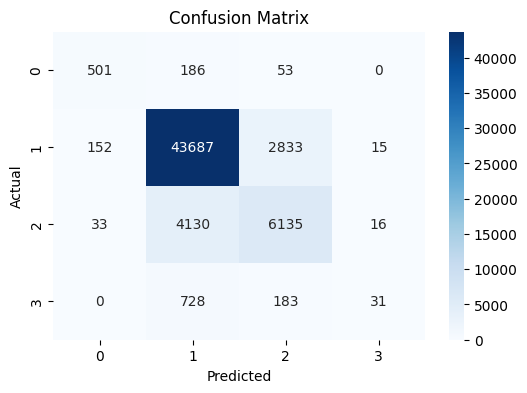

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       740
           1       0.90      0.94      0.92     46687
           2       0.67      0.59      0.63     10314
           3       0.50      0.03      0.06       942

    accuracy                           0.86     58683
   macro avg       0.70      0.56      0.58     58683
weighted avg       0.85      0.86      0.85     58683



In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [48]:
import pickle

# Simpan model ke file
model_filename = "voting_classifier_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(voting_classifier, file)

print(f"Model berhasil disimpan! Unduh file: {model_filename}")


Model berhasil disimpan! Unduh file: voting_classifier_model.pkl


In [49]:
import folium
from folium.plugins import MarkerCluster

latitude_center = 28.538336   # Bisa diubah ke input user
longitude_center = -81.379234  # Bisa diubah ke input user
tolerance = 0.1  # Rentang latitude/longitude untuk filter (bisa disesuaikan)

# 🎯 Pastikan indeks dari df digunakan, bukan dari X_test
X_index = df.sample(n=X_test.shape[0], random_state=42).index  

# Generate peta dengan koordinat pusat
orlando_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)

# Marker Cluster untuk efisiensi tampilan
accidents = MarkerCluster().add_to(orlando_map)

# Konversi prediksi ke pandas Series dengan indeks dari df
y_pred_series = pd.Series(voting_classifier_predictions, index=X_index)

# 🔹 Ambil sample data berdasarkan indeks yang sesuai
sample_size = 58683  
x_test_cla = df.loc[X_index].sample(n=min(sample_size, len(X_index)), random_state=42)

# 🔹 Filter hanya titik yang berada dalam rentang ±0.1° dari koordinat pusat
x_test_cla = x_test_cla[
    (x_test_cla['Start_Lat'].between(latitude_center - tolerance, latitude_center + tolerance)) &
    (x_test_cla['Start_Lng'].between(longitude_center - tolerance, longitude_center + tolerance))
]

# Ambil prediksi yang sesuai dengan sample
voting_classifier_predictions = y_pred_series.loc[x_test_cla.index]

# 🎨 Warna marker berdasarkan severity
color_map = {'4.0': "red", '3.0': "lightred", '2.0': "orange", '1.0': "beige"}

# Loop untuk menambahkan marker ke peta dengan informasi tambahan
for idx, row in x_test_cla.iterrows():
    lat, lng = row['Start_Lat'], row['Start_Lng']
    label = str(voting_classifier_predictions.loc[idx])
    color = color_map.get(label, "gray")

    # 🔹 Ambil informasi tambahan dari dataset
    desc = row.get('Description', 'No description')
    weather = row.get('Weather_Condition', 'Unknown')
    temp = row.get('Temperature(F)', 'N/A')
    wind_speed = row.get('Wind_Speed(mph)', 'N/A')
    visibility = row.get('Visibility(mi)', 'N/A')
    pressure = row.get('Pressure(in)', 'N/A')
    humidity = row.get('Humidity(%)', 'N/A')
    time = row.get('Start_Time', 'Unknown')
    airport = row.get('Airport_Code', 'N/A')
    
    # 🔹 Informasi tentang rambu lalu lintas
    traffic_signal = '✅' if row.get('Traffic_Signal', False) else '❌'
    railway = '✅' if row.get('Railway', False) else '❌'
    junction = '✅' if row.get('Junction', False) else '❌'

    # 📌 Format HTML untuk popup
    popup_html = f"""
    <b>Severity:</b> {label}<br>
    <b>Description:</b> {desc}<br>
    <b>Time:</b> {time}<br>
    <b>Weather:</b> {weather}<br>
    <b>Temperature:</b> {temp} °F<br>
    <b>Wind Speed:</b> {wind_speed} mph<br>
    <b>Visibility:</b> {visibility} mi<br>
    <b>Pressure:</b> {pressure} in<br>
    <b>Humidity:</b> {humidity}%<br>
    <b>Airport Code:</b> {airport}<br>
    <b>Traffic Signal:</b> {traffic_signal}<br>
    <b>Railway Crossing:</b> {railway}<br>
    <b>Junction Nearby:</b> {junction}
    """

    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color=color, icon="info-sign"),
        popup=folium.Popup(popup_html, max_width=400),  # Gunakan max_width agar rapi
    ).add_to(accidents)

# Tampilkan peta
orlando_map

In [50]:
# Simpan peta ke file HTML
orlando_map.save("orlando_map.html")
